### Importing necessary Machine Learning Modules

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the datasets

In [5]:

accidents_df = pd.read_csv(r"AccidentsData.csv")
health_facilities_df = pd.read_excel(r"kenya-health-facilities-2017_08_02.xlsx")

#### Display the columns of the datasets

In [6]:
print("Accidents DataFrame columns:")
print(accidents_df.columns)

print("Health Facilities DataFrame columns:")
print(health_facilities_df.columns)


Accidents DataFrame columns:
Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'ROAD', 'PLACE',
       'MV INVOLVED', 'BRIEF ACCIDENT DETAILS', 'NAME OF VICTIM', 'GENDER',
       'AGE', 'CAUSE CODE', 'VICTIM', 'NO.', 'DATE'],
      dtype='object')
Health Facilities DataFrame columns:
Index(['Code', 'Name', 'Registration_number', 'Keph level', 'Facility type',
       'Owner', 'Regulatory body', 'Beds', 'Cots', 'County', 'Constituency',
       'Sub county', 'Ward', 'Operation status', 'Open_whole_day',
       'Open_public_holidays', 'Open_weekends', 'Open_late_night',
       'Service_names', 'Approved', 'Public visible', 'Closed'],
      dtype='object')


### Merging aggregated dataset

In [7]:
# Aggregate accident data by COUNTY to find the number of accidents per county
accidents_by_county = accidents_df['COUNTY'].value_counts().reset_index()
accidents_by_county.columns = ['COUNTY', 'Number_of_Accidents']

# Aggregate health facilities by county to get the number of facilities per county
health_facilities_by_county = health_facilities_df['County'].value_counts().reset_index()
health_facilities_by_county.columns = ['COUNTY', 'Number_of_Health_Facilities']

# Merge the aggregated accident data with the health facilities data
combined_df = pd.merge(accidents_by_county, health_facilities_by_county, on='COUNTY', how='left')
# Display the combined data
print(combined_df.head())


     COUNTY  Number_of_Accidents  Number_of_Health_Facilities
0   NAIROBI                  183                        783.0
1    KIAMBU                   99                        416.0
2    NAKURU                   76                        357.0
3   MAKUENI                   60                        236.0
4  MACHAKOS                   50                        320.0


In [8]:
# Find the county with the most accidents
county_most_accidents = combined_df.loc[combined_df['Number_of_Accidents'].idxmax()]
print(f"County with the most accidents: {county_most_accidents['COUNTY']}")
print(f"Number of accidents: {county_most_accidents['Number_of_Accidents']}")


County with the most accidents: NAIROBI
Number of accidents: 183


In [9]:
# Analyze whether the county has enough resources
county_resources = combined_df[['COUNTY', 'Number_of_Accidents', 'Number_of_Health_Facilities']]
county_resources['Accidents_per_Facility'] = county_resources['Number_of_Accidents'] / county_resources['Number_of_Health_Facilities']
county_resources = county_resources.replace([np.inf, -np.inf], np.nan).fillna(0)

# Display the county resources
print(county_resources)


             COUNTY  Number_of_Accidents  Number_of_Health_Facilities  \
0           NAIROBI                  183                        783.0   
1            KIAMBU                   99                        416.0   
2            NAKURU                   76                        357.0   
3           MAKUENI                   60                        236.0   
4          MACHAKOS                   50                        320.0   
5          KAKAMEGA                   40                        255.0   
6             NYERI                   38                        299.0   
7            KILIFI                   32                        203.0   
8           KAJIADO                   31                        271.0   
9            KISUMU                   30                        202.0   
10             EMBU                   29                        156.0   
11          MOMBASA                   27                        250.0   
12          KERICHO                   26           

### Visualizing the data

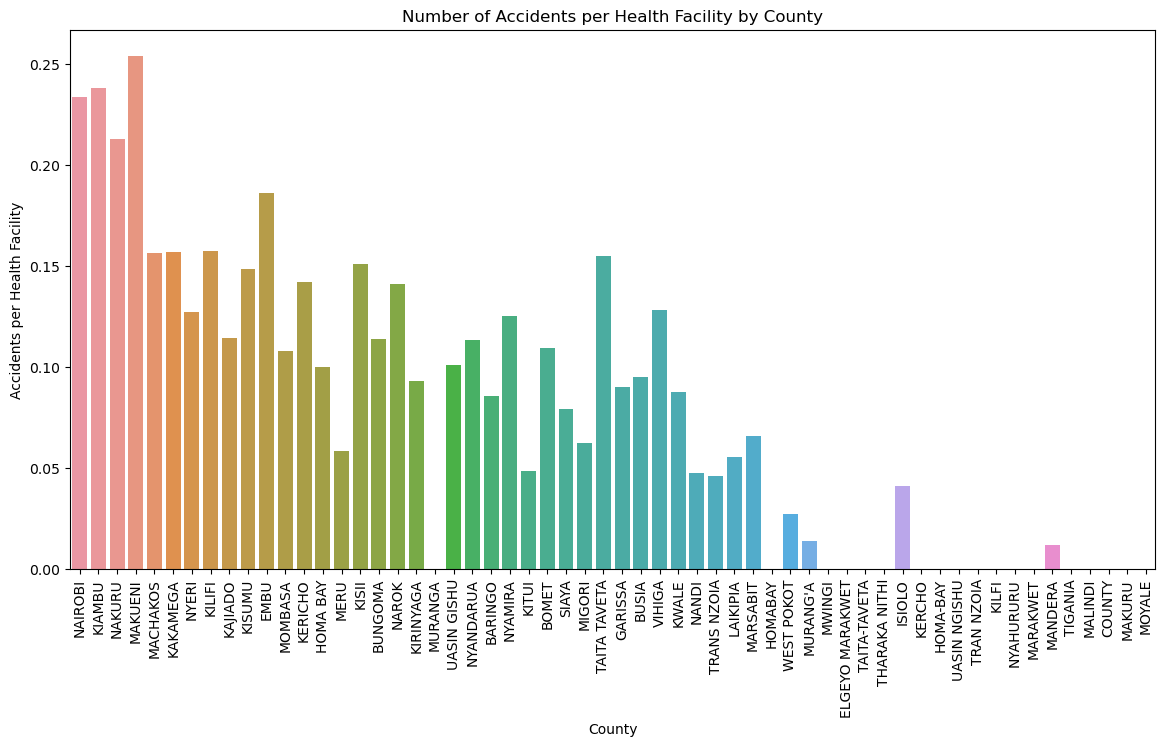

c:\Users\bonfa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


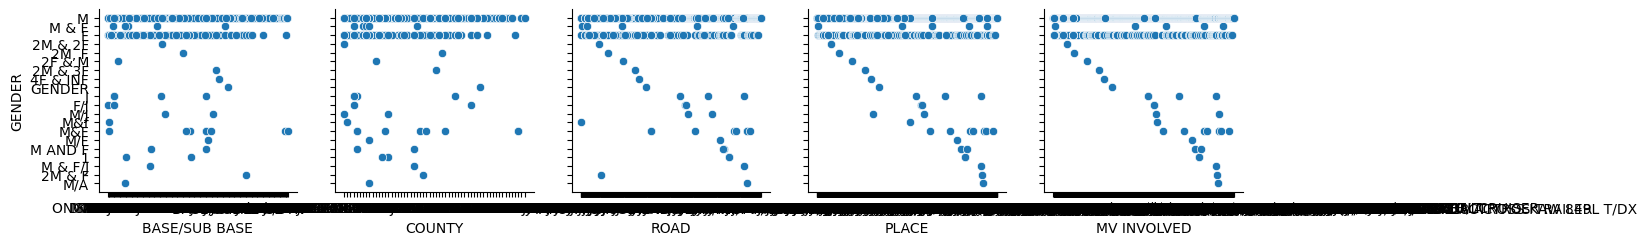

In [11]:
plt.figure(figsize=(14, 7))
sns.barplot(x='COUNTY', y='Accidents_per_Facility', data=county_resources)
plt.xticks(rotation=90)
plt.title('Number of Accidents per Health Facility by County')
plt.xlabel('County')
plt.ylabel('Accidents per Health Facility')
plt.show()
pairplot1 = sns.pairplot(accidents_df,x_vars=accidents_df.columns[1:6],y_vars=['GENDER'])
plt.show()